<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout2_PartB_ConditionalDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #2 Part B: Variation in Conditional Distribution


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 2.1 (Con't)

Consider the following data that has been collected from students in my introductory statistics course over several past semesters.  

<table>
  <tr>
    <td width='30%' valign='top'>
      <ul>
        <li><strong>Response Variable</strong>: Hair Length (mm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Gender</li>
          <li>Height (inches)</li>
         </ul>
    </ul>
    </td>
    <td width='70%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1h4lXsxXMRHVRtdg48vdbMbGahWfGz_oS" width='50%' height='50%'></img></p>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1W1F3yLFTI-AOUOg10Gnl7zsetSX-6lXz" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Concept of Conditioning

As stated previously, there are several variables that may influence a person’s hair length.  For example, gender is likely to help explain some of the variation in hair lengths – i.e. women tend to have longer hair then men.  If you take the gender into consideration when analyzing hair length, then it is said that the conditional distribution of hair length given gender is being considered.


>  **Conditional Distribution** – the distribution of the response variable conditioning on (i.e. taking into consideration) one or more other variables


Visually, the conditional distribution simply means that the distribution of the response will be considered for each gender, separately. 

<table border="1" align="center">
  <tr>
    <td align="center" valign="top" width="50%"><strong>Marginal Distribution</strong></td>
    <td align="center" valign="top" width="50%"><strong>Conditional Distribution given Gender</strong></td>
  </tr>
  <tr>
    <td align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=1VFXNKnm-_M7sz4PQomTxePhiqA7ZAUKn"></img>
    </td>
    <td align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=1zkQ95xD6sXxe0dWPI-o3IafQIVVbv51x"></img>
    </td>
  </tr>
</table>


The following graph communicates the difference between the marginal distribution and the two conditional distributions.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1Ht8FKSfzQy3NykINpjtVtGcp0--HPcA1"></img></p>

### Getting Summaries for each Distribution

First, getting the tidyverse package loaded into this COLAB session.

In [ ]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Reading in the data using read_csv() via tidyverse. 

In [ ]:
# Reading data in using read.csv via Base 
HairLength <- read_csv("http://www.StatsClass.org/stat360/Datasets/HairLength.csv")

Rows: 131 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Gender, Name
dbl (3): RowID, Height, Length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a look at the first few lines in this data.frame.

In [ ]:
# View the first few rows of data
head(HairLength)

RowID,Gender,Name,Height,Length
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,F,Kelsie,66,359
2,M,Eric,73,50
3,F,Susan,66,295
4,F,Alesha,72,320
5,F,Alexa,70,470
6,F,Jackie,62,180


**Marginal Distribution:  Total Unexplained Variation**

>  The total amount of unexplained variation in the marginal distribution is commonly referred to as the Total Sum of Squared Error. 

$$\begin{array}{rcl}
\mbox{Sum of Squared Error} & = & \sum{(Data \space Point - Mean)^2} \\
 & = & \sum{(Residuals)^2}
\end{array}
$$

The following code computes the Sum of Squared Error (SSE) in the marginal distribution.

In [ ]:
#Getting sum of squared error in marginal distribution
(HairLength 
  %>% summarize(
                  Mean = mean(Length),
                  Variance = var(Length),
                  Count = n(),
                  SSE_MarginalDistribution = (Count-1)*Variance
               )
)

Mean,Variance,Count,SSE_MarginalDistribution
<dbl>,<dbl>,<int>,<dbl>
237.2595,29515.19,131,3836975


**Conditional Distribution:  Total Unexplained Variation**

>  The total amount of unexplained variation in the conditional distribution is similar to that of the marginal distibution, with the exception that the mean is computed within each group.

In [ ]:
#Getting sum of squared error in conditional distribution
(HairLength
  %>% group_by(Gender) 
  %>% summarize(
                  Mean = mean(Length),
                  Variance = var(Length),
                  Count = n(),
                  SSE = (Count-1)*Variance
               )
) -> GenderSummaries

GenderSummaries

cat("\n\n")
(GenderSummaries
  %>% summarize(
                SSE_ConditionalDistribution = sum(SSE)
  )
)

Gender,Mean,Variance,Count,SSE
<chr>,<dbl>,<dbl>,<int>,<dbl>
F,346.74390,14171.181,82,1147865.62
M,54.04082,1277.165,49,61303.92


SSE_ConditionalDistribution
<dbl>
1209170


From a modeling perspective, a significant advantage of considering the conditional distribution is the possible **reduction** in the unexplained variation.  Consider the substantial reduction in these quantities for the data considered here.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1PuvRdDxuwoAF9zAHSowopjC2dm74ahLO"></img></p>

Identify the following quantites:

>  **Marginal Distribution**

*   $\hat{E}(Hair \space Length) = $
*   $\widehat{Var}(Hair \space Length) = $
*   $n=$
*   $SSE_{Marginal} = $




>  **Conditional Distribution**

*   $\hat{E}(Hair \space Length | Gender = F) = $
*   $\widehat{Var}(Hair \space Length | Gender = F) = $
*   $n_{F}=$
*   $SSE_{F} = $

<br>

*   $\hat{E}(Hair \space Length | Gender = M) = $
*   $\widehat{Var}(Hair \space Length | Gender = M) = $
*   $n_{M}=$
*   $SSE_{M} = $

<br>

*   $SSE_{Conditional} = $

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   What does it mean if the residual value is positive?  Negative?

2.   What does it mean if the residual is small (i.e. close to zero)?

3.   Suppose the residual value for the particular data point is positive.  Is the mean an *over-estimate* or an *under-estimate* for this particular data value?  Explain.



<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>



---



---


In [ ]:
#@title Custom Function for Plotting Residuals in Marginal/Conditional Distributions
# See bottom of cell for use cases
RSS <- function(myformula=y~x, mydata=data, PlotMeans=TRUE,PlotResids=TRUE, cutpoints=c(NA)){
  
  formula_vec <- all.vars(myformula)
  ydata<-mydata[ , which(colnames(mydata)==formula_vec[1])]
  x<-mydata[ , which(colnames(mydata)==formula_vec[2])]
 
  if(is.factor(x)==TRUE){
    numlevels <- length(levels(x))
 
    xdata<-as.numeric(x)
    xjitter <- xdata + runif(length(xdata),min=-0.20,max=0.20)
  
    #Setting up parameters for axis limits
    xmin <- c(-1)
    xmax <- c(numlevels+1)
    ymin <- min(ydata)-(0.10*(max(ydata)-min(ydata)))
    ymax <- max(ydata)+(0.05*(max(ydata)-min(ydata)))
  
    plot(xjitter, ydata ,xlim=c(xmin,xmax),ylim=c(ymin,ymax),axes=F,xlab=formula_vec[2], ylab=formula_vec[1],type="n")
    points(xjitter, ydata)
    axis(1,at=c(-1,seq(from=1,to=max(xdata),by=1),xmax),labels=c("",levels(x),""))

    axis(2)
    xjitter_marginal <- -0.50+runif(length(ydata),min=-0.20,max=0.20)
    points(xjitter_marginal, ydata)
    abline(v=0,lwd=2)
  
    # Plotting of marginal distribution #####################
    #
    #Obtain grand mean
    grand.mean=mean(ydata)
  
    if(PlotMeans == "TRUE"){
      segments(-0.65,grand.mean,-0.35,grand.mean,lwd=2)
    }
    resid2 <- 0
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter_marginal[i],ydata[i],xjitter_marginal[i],grand.mean,lwd=1)
        resid2 <- resid2 + (ydata[i]-grand.mean)^2
      }
      text(-0.50, ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2,digits=3)),cex=0.75)
    }
    #######################################################
  
  
    # Plotting the conditional distriubitons ##############
    #
  
    #Obtain mean for each group
    group.means<-c()
    for(i in 1:numlevels){
      group.means[i] <- mean(ydata[x == levels(x)[i]])
    }
  
    if(PlotMeans == "TRUE"){
      for(i in 1:numlevels){
        segments(i-0.25,group.means[i],i+0.25,group.means[i],lwd=2)
      }
    }
  
    resid2 <- rep(0,length(levels(x)))
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter[i],ydata[i],xjitter[i],group.means[xdata[i]])
        resid2[xdata[i]] <- resid2[xdata[i]] + (ydata[i] - group.means[xdata[i]])^2
      }
      for(i in 1:numlevels){
        text(i, ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[i],digits=3)),cex=0.75)
      }
    }
  ###################################################### 
  }
  
  
  if(is.factor(x)==FALSE){
    
    xdata<-x
    rangex <- max(x) - min(x)
    
    if(max(table(x))/length(x) > 0.10){
      xdata <- x + runif(length(xdata),min=-0.01*rangex,max=0.01*rangex)
      
    }
    
    xmin<-min(x)-0.25*rangex
    xmax<-max(x)+0.05*rangex
    ymin <- min(ydata)-(0.10*(max(ydata)-min(ydata)))
    ymax <- max(ydata)+(0.05*(max(ydata)-min(ydata)))
    
    plot(xdata, ydata ,xlim=c(xmin,xmax),ylim=c(ymin,ymax),axes=F,xlab=formula_vec[2], ylab=formula_vec[1],type="n")
    points(xdata, ydata)
    axis(1) 
    #Hide axis below xmin, ymin
    #rect(xmin,ymin-(0.20*(max(ydata)-min(ydata))),(min(x)-(0.05*rangex)),ymin, col="white",border=2)
    axis(2)
    xjitter_marginal <- (min(x)-0.15*rangex)+runif(length(xdata),min=-0.05*rangex,max=0.05*rangex)
    points(xjitter_marginal, ydata)
    abline(v=(min(x)-(0.05*rangex)),lwd=2)
  
    # Plotting of marginal distribution #####################
    #
    #Obtain grand mean
    grand.mean=mean(ydata)
    
    if(PlotMeans == "TRUE"){
      segments((min(x)-0.20*rangex),grand.mean,(min(x)-0.10*rangex),grand.mean,lwd=2)
    }
    resid2 <- 0
    if(PlotResids == "TRUE"){
      for(i in 1:length(ydata)){
        segments(xjitter_marginal[i],ydata[i],xjitter_marginal[i],grand.mean,lwd=1)
        resid2 <- resid2 + (ydata[i]-grand.mean)^2
      }
      text((min(x)-0.15*rangex), ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2,digits=3)),cex=0.75)
    }
    ########################################################
    
    
    # Cutpoints provided, so build conditional distributions ##############
    #
    if(sum(is.na(cutpoints)) == 0){
    
      #Ensure incoming cutpoints are sorted
      cutpoints <- sort(cutpoints)
      abline(v=cutpoints,lty=2)
      
      group.means<-c()
      for(i in 1:(1+length(cutpoints))){
        if(i==1){
          group.means[i]<-mean(ydata[xdata <= cutpoints[i]])
        } else if(i == (1+length(cutpoints))){
          group.means[i]<-mean(ydata[xdata > cutpoints[i-1]])
        } else {
          group.means[i]<- mean(ydata[xdata <= cutpoints[i] & xdata > cutpoints[i-1]])
        }
      }
     
    
      if(PlotMeans == "TRUE"){
        for(i in 1:(1+length(cutpoints))){
          if(i==1){
            segments(min(xdata),group.means[i],cutpoints[1],group.means[i],lwd=2)
          } else if(i == (1+length(cutpoints))){
            segments(cutpoints[i-1],group.means[i],max(xdata),group.means[i],lwd=2)
          } else {
            segments(cutpoints[i-1],group.means[i],cutpoints[i],group.means[i],lwd=2)
          }
        }
      }
      
      
      resid2 <- rep(0,(1+length(cutpoints)))
      if(PlotResids == "TRUE"){
        for(i in 1:length(ydata)){
          if(xdata[i] <= cutpoints[1]){
              segments(xdata[i],ydata[i],xdata[i],group.means[1])
              resid2[1]<-resid2[1]+(ydata[i]-group.means[1])^2
          } else if(xdata[i] > cutpoints[length(cutpoints)]){
            segments(xdata[i],ydata[i],xdata[i],group.means[1+length(cutpoints)])
            resid2[1+length(cutpoints)]<-resid2[1+length(cutpoints)]+(ydata[i]-group.means[1+length(cutpoints)])^2
          } else {
            
            for(j in 2:length(cutpoints)){
              if(xdata[i] > cutpoints[j-1] & xdata[i] <= cutpoints[j]){
                segments(xdata[i],ydata[i],xdata[i],group.means[j])
                resid2[j]<-resid2[j]+(ydata[i]-group.means[j])^2
              }
            }   
            
          }
          
        }
        for(i in 1:(1+length(cutpoints))){
          if(i == 1){
              text(((min(xdata)+cutpoints[1])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[1],digits=3)),cex=0.75)
          } else if(i == (1+length(cutpoints))){
              text(((max(xdata)+cutpoints[length(cutpoints)])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[1+length(cutpoints)],digits=3)),cex=0.75)
          } else {
              text(((cutpoints[i-1]+cutpoints[i])/2),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(resid2[j],digits=3)),cex=0.75)
          }
          
        }
      }
    }
    
    if(sum(is.na(cutpoints)) > 0){
    
      fit<-lm(ydata~x)
      if(PlotMeans == TRUE){
        segments(min(x),(fit$coefficients[1]+fit$coefficients[2]*min(x)),max(x),(fit$coefficients[1]+fit$coefficients[2]*max(x)))
      }
      
      if(PlotResids == TRUE){
        for(i in 1:length(ydata)){
          segments(xdata[i],ydata[i],xdata[i],(fit$coefficients[1]+fit$coefficients[2]*xdata[i]), lwd=2)
        }
          text(mean(x),ymin+(0.02*(max(ydata)-min(ydata))),paste("SSE:",format(sum(fit$residuals^2),digits=3)),cex=0.75)
      } 
    }
    
   
  }

}

##################################################################################
#Some example executions for Impact Crater dataset
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70))
#RSS(Diameter~SandType,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)
#RSS(Diameter~ProjectileType,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(130))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE,cutpoints=c(70, 130))
#RSS(Diameter~Height,mydata=impactcrater,PlotMeans=TRUE,PlotResids=TRUE)





Consider the following use of the custom RSS() function for plotting residuals.

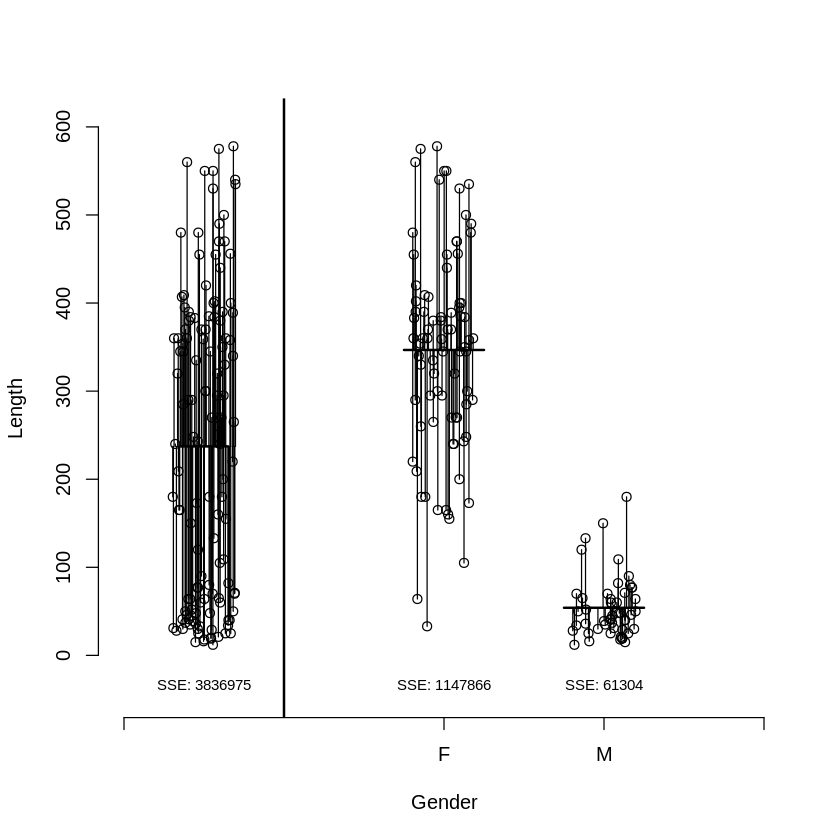

In [ ]:
RSS(Length~Gender,mydata=HairLength, PlotMeans=TRUE, PlotResids=TRUE)



---



---
End of Document


## Proportion of Variation than can be Explained

The proportion of unexplained variation taken away by considering the conditional distributions is typically used as a measure of overall usefulness of the conditioning variable(s).  This proportion is commonly referred to as the **coefficient of determination** or **$R^{2}$**.


$$
R^2 = \frac{\mbox{Total Unexplained in Marginal Distribution}-\mbox{Total Unexplained in Conditional Distributions}}{\mbox{Total Unexplained in Marginal Distribution}}
$$

The numerator of of $R^2$ is simply the amount of variation that *can* be explained by conditioning.  Thus, $R^2$ is often expressed as

$$
R^2 = \frac{\mbox{Variation that can be Explained by Conditioning}}{\mbox{Total Unexplained in Marginal Distribution}}
$$



$$
\begin{array}{rcl}
R^2 & = & \frac{3836975-1209170}{3836975} \\
    & = & \frac{2627805}{3836975} \\
    & = & 0.6849 \\
\end{array}
$$

<u>Interpretation</u>:  About 70\% of the total variation in Hair Length can be explained by considering the Gender of the individual.

<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Questions

For this task, consider again the Impact Crater dataset.

1.   What is the total amount of unexplained variation in Diameter?
2.   What is the total amount of unexplained variation in Diameter when conditioning on SandType?
3.   What is the total amount of unexplained variation in Diameter when conditioning on ProjectileType?
4.   Compute the appropirate $R^2$ measure when conditioning on SandType.  Next, compute the appropirate $R^2$ measure when conditioning on ProjectileType.
5. Based on the $R^2$ calculations, which variable (SandType or ProjectileType) does a better job of explaining the variation in Diameter?  Discuss.



<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

End of Document